In [1]:
from bmtk.builder.networks import NetworkBuilder
from bmtk.utils.sim_setup import build_env_bionet
import json
from edit_genome import process_json
from bmtk.simulator import bionet
from bmtk.analyzer.spike_trains import to_dataframe
from bmtk.analyzer.cell_vars import plot_report
import os
import shutil
from neuron import h
import ipywidgets as widgets
from ipywidgets import HBox,VBox,Label,Layout
from IPython.display import display
%matplotlib inline

In [3]:
net = NetworkBuilder('BL')
net.add_nodes(cell_name='BL',
          potental='exc',
          model_type='biophysical',
          model_template='ctdb:Biophys1.hoc',
          model_processing='aibs_allactive',
          dynamics_params='BL_fit.json',
          morphology='reconstruction.swc')
shutil.rmtree('./network')

net.build()
net.save_nodes(output_dir='network')
thalamus = NetworkBuilder('mthalamus')
thalamus.add_nodes(N=10,
                   pop_name='tON',
                   potential='exc',
                   model_type='virtual')

thalamus.add_edges(source={'pop_name': 'tON'}, target=net.nodes(),
                   connection_rule=5,
                   syn_weight=0.001,
                   delay=2.0,
                   weight_function=None,
                   target_sections=['basal', 'apical'],
                   distance_range=[0.0, 150.0],
                   dynamics_params='AMPA_ExcToExc.json',
                   model_template='exp2syn')

thalamus.build()
thalamus.save_nodes(output_dir='network')
thalamus.save_edges(output_dir='network')

from bmtk.utils.reports.spike_trains import PoissonSpikeGenerator

psg = PoissonSpikeGenerator(population='mthalamus')
psg.add(node_ids=range(10),  # Have 10 nodes to match mthalamus
        firing_rate=10.0,    # 10 Hz, we can also pass in a nonhomoegenous function/array
        times=(0.0, 3.0))    # Firing starts at 0 s up to 3 s
shutil.rmtree('./inputs')
psg.to_sonata('inputs/mthalamus_spikes.h5')


from bmtk.utils.sim_setup import build_env_bionet

build_env_bionet(base_dir='.',      
                 network_dir='network',
                 tstop=3000.0, dt=0.1,
                 report_vars=['v'],     # Record membrane potential and calcium (default soma)
                 spikes_inputs=[('mthalamus',   # Name of population which spikes will be generated for
                                './inputs/mthalamus_spikes.h5')]
                )

shutil.copy('sources/BL_fit.json','components/biophysical_neuron_models/')
shutil.copy('sources/neuronal_model_491766131/reconstruction.swc','components/morphologies/')
shutil.copy('sources/AMPA_ExcToExc.json','components/synaptic_models/')
shutil.rmtree('components/mechanisms/')
shutil.copytree('sources/modfiles','components/mechanisms/modfiles')
shutil.copytree('sources/x86_64','components/mechanisms/x86_64')

'\nwith open("./simulation_config.json",\'r\') as load_f:\n        load_dict = json.load(load_f)\n        #print(load_dict)\n        load_dict[\'inputs\'] =  {"current_clamp1": {\n        "input_type": "current_clamp",\n        "module": "IClamp",\n        "node_set": "all",\n        "amp": 0.3,\n        "delay": 300.0,\n        "duration": 1000.0\n        }\n        }\nwith open("./simulation_config.json",\'w\') as dump_f:\n    json.dump(load_dict,dump_f)\n'

In [5]:
filePath = './sources/modfiles'
a = os.listdir(filePath)

w_0 = widgets.Checkbox(value=False,description=a[2],disabled=False)
w_1 = widgets.Checkbox(value=False,description=a[18],disabled=False)
w_2 = widgets.Checkbox(value=False,description=a[12],disabled=False)

def update_0(*args):
    if w_0.value:
        text0 = widgets.FloatText(
            value=7.5,
            description='NaP:',
            disabled=False
        )
        value0 = text0.value
        process_json('./components/biophysical_neuron_models/BL_fit.json','Nap',value0)
        display(text0)
def update_1(*args):
    if w_1.value:
        text1 = widgets.FloatText(
            value=7.5,
            description='Ih:',
            disabled=False
        )
        value1 = text1.value
        process_json('./components/biophysical_neuron_models/BL_fit.json','Ih',value1)
        display(text1)        
def update_2(*args):
    if w_2.value:
        text2 = widgets.FloatText(
            value=7.5,
            description='Im:',
            disabled=False
        )
        value2 = text2.value
        process_json('./components/biophysical_neuron_models/BL_fit.json','Im',value2)
        display(text2)              
        
w_0.observe(update_0,'value')
w_1.observe(update_1,'value')
w_2.observe(update_2,'value')
ui1 = HBox([VBox([Label('Channels')],layout=Layout(width='10%')),VBox([w_0,w_1,w_2],layout=Layout(width='38%'))])
ui1

2019-10-04 18:03:19,742 [INFO] Created log file


INFO:NEURONIOUtils:Created log file


2019-10-04 18:03:19,935 [INFO] Building cells.


INFO:NEURONIOUtils:Building cells.


2019-10-04 18:03:20,490 [INFO] Building recurrent connections


INFO:NEURONIOUtils:Building recurrent connections


2019-10-04 18:03:20,493 [INFO] Building virtual cell stimulations for mthalamus_spikes


INFO:NEURONIOUtils:Building virtual cell stimulations for mthalamus_spikes


2019-10-04 18:03:20,682 [INFO] Running simulation for 3000.000 ms with the time step 0.100 ms


INFO:NEURONIOUtils:Running simulation for 3000.000 ms with the time step 0.100 ms


2019-10-04 18:03:20,685 [INFO] Starting timestep: 0 at t_sim: 0.000 ms


INFO:NEURONIOUtils:Starting timestep: 0 at t_sim: 0.000 ms


2019-10-04 18:03:20,688 [INFO] Block save every 5000 steps


INFO:NEURONIOUtils:Block save every 5000 steps


2019-10-04 18:03:21,069 [INFO]     step:5000 t_sim:500.00 ms


INFO:NEURONIOUtils:    step:5000 t_sim:500.00 ms


2019-10-04 18:03:21,400 [INFO]     step:10000 t_sim:1000.00 ms


INFO:NEURONIOUtils:    step:10000 t_sim:1000.00 ms


2019-10-04 18:03:21,784 [INFO]     step:15000 t_sim:1500.00 ms


INFO:NEURONIOUtils:    step:15000 t_sim:1500.00 ms


2019-10-04 18:03:22,120 [INFO]     step:20000 t_sim:2000.00 ms


INFO:NEURONIOUtils:    step:20000 t_sim:2000.00 ms


2019-10-04 18:03:22,403 [INFO]     step:25000 t_sim:2500.00 ms


INFO:NEURONIOUtils:    step:25000 t_sim:2500.00 ms


2019-10-04 18:03:22,688 [INFO]     step:30000 t_sim:3000.00 ms


INFO:NEURONIOUtils:    step:30000 t_sim:3000.00 ms


2019-10-04 18:03:22,700 [INFO] Simulation completed in 2.018 seconds 


INFO:NEURONIOUtils:Simulation completed in 2.018 seconds 


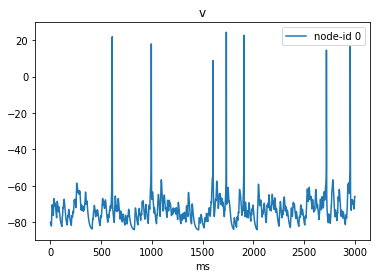

In [4]:
from bmtk.simulator import bionet

conf = bionet.Config.from_json('simulation_config.json')
conf.build_env()
net = bionet.BioNetwork.from_config(conf)
sim = bionet.BioSimulator.from_config(conf, network=net)
sim.run()

from bmtk.analyzer.cell_vars import plot_report

plot_report(config_file='simulation_config.json')